In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np

## Data Preprocess

In [38]:
df = pd.read_csv("kc_house_data.csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [40]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [41]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df.drop(columns=["id","date"] , inplace=True)

In [44]:

features= df.loc[:, ~(df.columns.unique().isin(["price"]))]
target = df.loc[:,["price"]]


In [45]:
#Scaling the data

from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test =train_test_split(features,target, test_size=0.2 , random_state=42)

scaler=StandardScaler()


x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


### Finding the best model 

In [46]:
import keras
from keras_tuner.tuners import RandomSearch


In [47]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
    for i in range(hp.Int("num_layers", 1, 20)):
        model.add(
            keras.layers.Dense(
                
                units=hp.Int(f"units_{i}", min_value=18, max_value=450, step=9),
                activation=hp.Choice("activation", ["relu"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_absolute_error",
        metrics=["mean_absolute_error"],
    )
    return model

In [ ]:
tuner = RandomSearch(
    hypermodel=build_model,
    objective="val_mean_absolute_error",
    max_trials=3,
    executions_per_trial=10,
    overwrite=True,
    directory="ANN",
    project_name="Regression_House_Price",
)

In [49]:
stop_early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [50]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 18, 'max_value': 450, 'step': 9, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [51]:
tuner.search(x_train,y_train ,epochs=200,validation_data=(x_test,y_test) , callbacks=[stop_early])

Trial 3 Complete [00h 33m 12s]
val_mean_absolute_error: 72580.02265625

Best val_mean_absolute_error So Far: 72580.02265625
Total elapsed time: 00h 59m 06s


In [52]:
tuner.results_summary()

Results summary
Results in ANN\Regression_House_Price
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 2 summary
Hyperparameters:
num_layers: 4
units_0: 243
activation: relu
dropout: False
lr: 0.00038877295727384804
units_1: 441
units_2: 234
units_3: 342
units_4: 252
units_5: 63
units_6: 45
Score: 72580.02265625

Trial 0 summary
Hyperparameters:
num_layers: 2
units_0: 81
activation: relu
dropout: False
lr: 0.00510495841814135
units_1: 18
Score: 94821.70234375

Trial 1 summary
Hyperparameters:
num_layers: 7
units_0: 306
activation: relu
dropout: True
lr: 0.0004906680052232292
units_1: 261
units_2: 18
units_3: 18
units_4: 18
units_5: 18
units_6: 18
Score: 109201.15078125


In [53]:
#Best model
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

C:\Users\PC1\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 243)            │         4,617 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 441)            │       107,604 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 234)            │       103,428 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 342)            │        80,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           343 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 296,362 (1.13 MB)

 Trainable params: 296,362 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
#Build and train the model with the best hyperparameters

best_hps = tuner.get_best_hyperparameters(5)

model = build_model(best_hps[0])

model.fit(x=x_train, y=y_train, validation_split=0.2 ,epochs=200)

Epoch 1/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 423796.7812 - mean_absolute_error: 423796.7812 - val_loss: 128195.1797 - val_mean_absolute_error: 128195.1797
Epoch 2/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 120202.8594 - mean_absolute_error: 120202.8594 - val_loss: 111955.2422 - val_mean_absolute_error: 111955.2422
Epoch 3/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 111296.1562 - mean_absolute_error: 111296.1562 - val_loss: 108138.9453 - val_mean_absolute_error: 108138.9453
Epoch 4/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 108331.1484 - mean_absolute_error: 108331.1484 - val_loss: 105900.2891 - val_mean_absolute_error: 105900.2891
Epoch 5/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 107875.1016 - mean_absolute_error: 107875.1016 - val_loss: 104106.6953 - val_mean_absolute_error: 104106.6953
Epoch 6/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 106772.2188 - mean_absolute_error: 106772.2188 - val_loss: 103516.7422 - val_mean_ab

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Axes: title={'center': 'Predicted value vs target value'}, xlabel='Predicted value', ylabel='target value'>

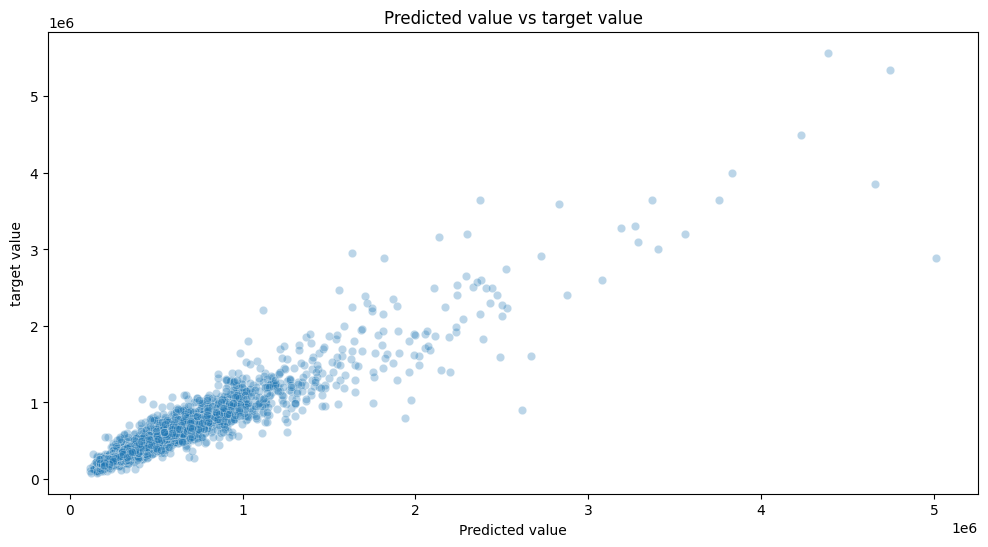

In [58]:
import matplotlib.pyplot as plt 
import seaborn as sns

predict = [i[0] for i in  model.predict(x_test)]
data = pd.DataFrame({"predict": predict , "true_value" : y_test.price})

plt.figure(figsize=(12,6))
plt.title("Predicted value vs target value")
plt.ylabel("target value")
plt.xlabel("Predicted value")
sns.scatterplot(data = data , x="predict", y= "true_value", alpha=0.30)



In [59]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error , root_mean_squared_error  

print("MAE: ", mean_absolute_error(predict , y_test))
print("MAPE: ", mean_absolute_percentage_error(predict , y_test))
print("RMSE: ", root_mean_squared_error(predict , y_test))

MAE:  71293.14455383993
MAPE:  0.12926294242315003
RMSE:  129690.04519255627
